<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data Science and AI
## Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labourious and iterative processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.
Is this guy going to donate blood in march 2007 or not
## Actual Question
Choose the **one** question that should be answered.
Is this guy going to donate blood in march 2007 or not

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
import pandas as pd
df = pd.read_csv('../../DATA/transfusion.data')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

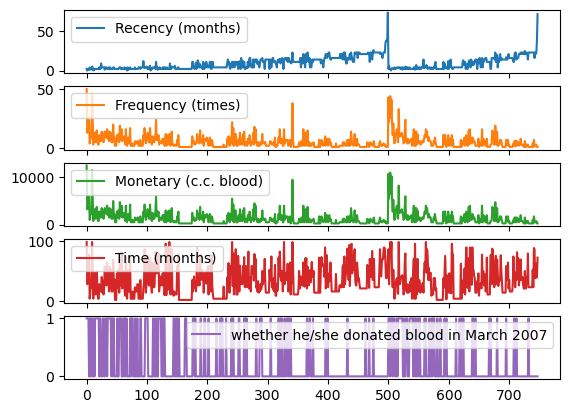

In [20]:
df.plot(subplots=True)

In [18]:
df['whether he/she donated blood in March 2007'].value_counts(normalize=True)

whether he/she donated blood in March 2007
0    0.762032
1    0.237968
Name: proportion, dtype: float64

In [21]:
df.corr()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
whether he/she donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [22]:
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated_Mar_2007']
df.head()

,Recency,Frequency,Monetary,Time,Donated_Mar_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

### what i learned
in the answer, the box plot is not shown as it supposed to be horizotal. 
I need to add an parameter for the boxplot orient='h' to make it work. 

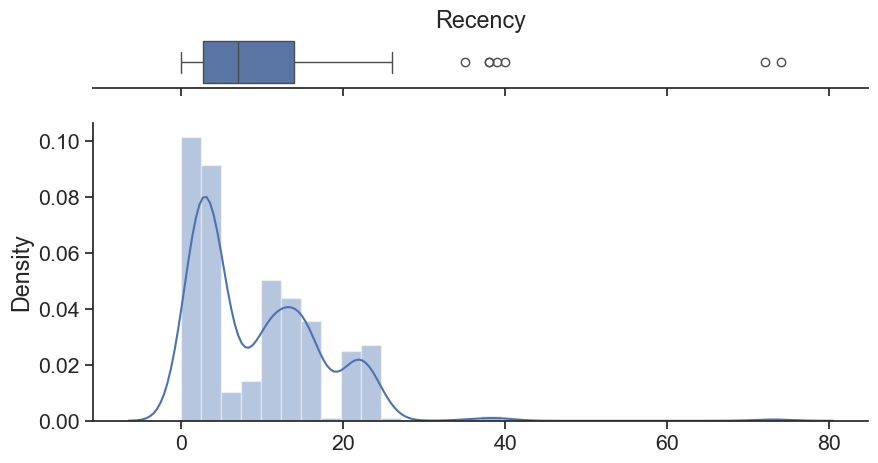

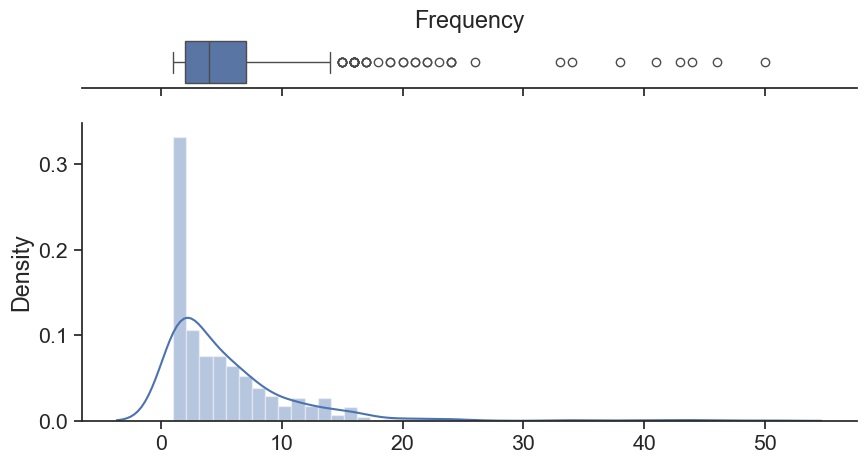

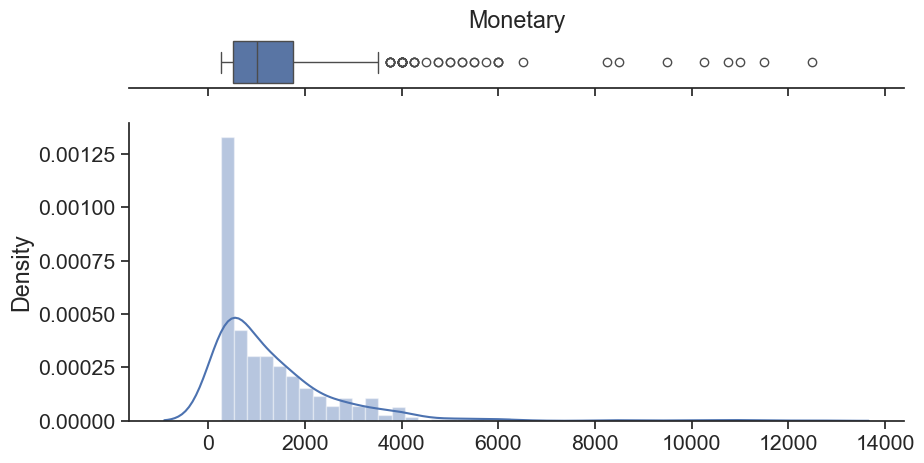

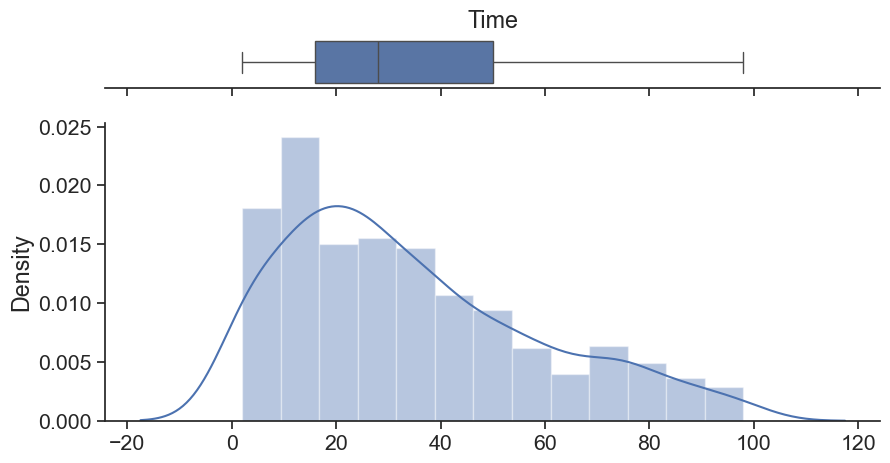

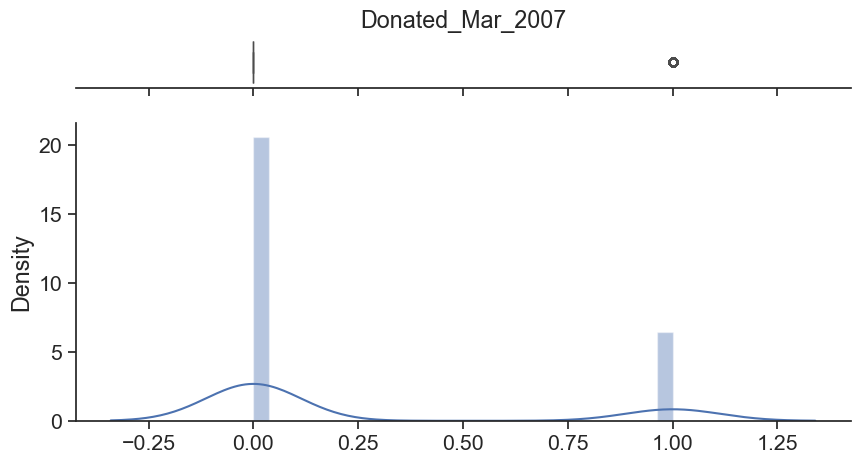

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
sns.set(style='ticks', font_scale=1.4)
warnings.filterwarnings('ignore')
for c in df.columns: 
    fig, ax = plt.subplots(2, figsize=(10, 5), sharex=True, 
                           gridspec_kw={'height_ratios': (0.15, 0.85)})
    ax_box = ax[0]
    ax_box = sns.boxplot(df[c], ax=ax_box, orient='h')
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)

    ax_hist = ax[1]
    ax_hist = sns.distplot(df[c], ax=ax_hist)
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)  
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

In [39]:
features = ['Recency', 'Frequency', 'Monetary', 'Time']
outcome = 'Donated_Mar_2007'
X = df[features].copy()
y = df[outcome].astype(str).copy()

In [40]:
X.shape

(748, 4)

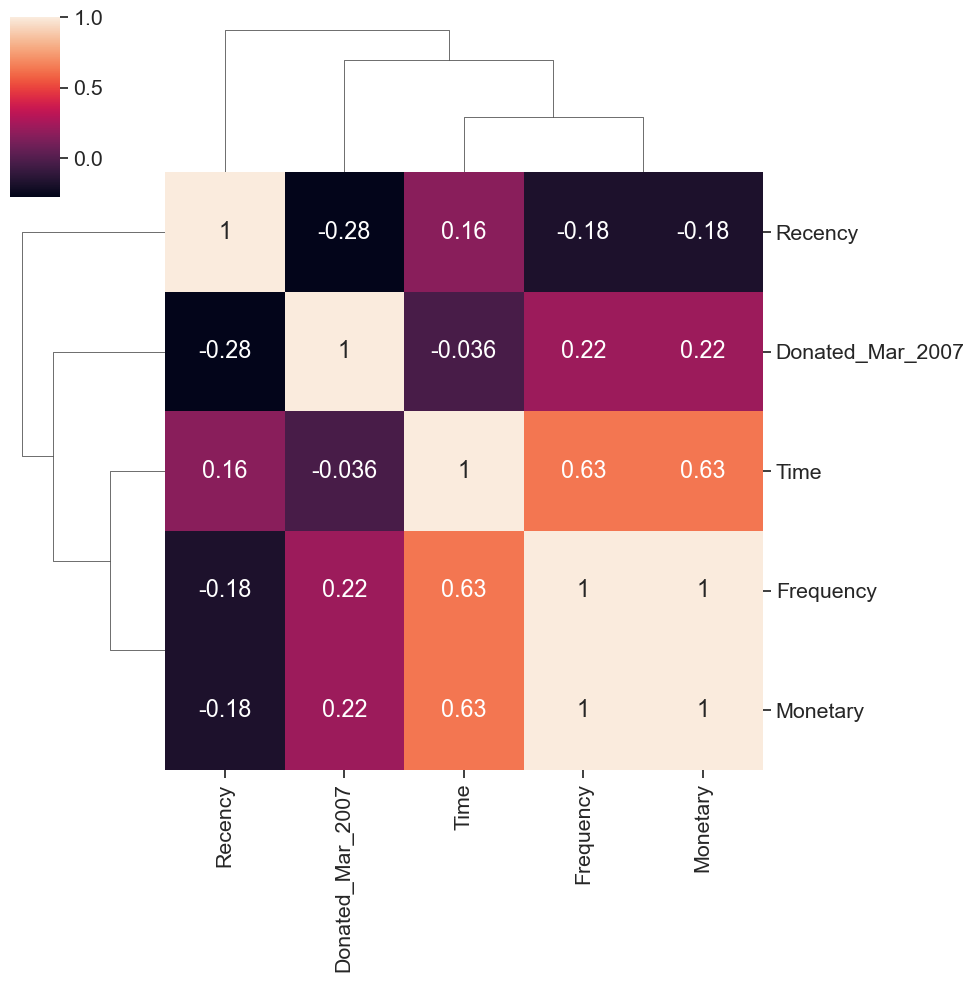

In [42]:
sns.clustermap(df.corr(), annot=True)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)? X, for the Frequency and Monetary, we should choose one casue they are highly related to each other. since Monetary number is very large, comparing with others, i will choose Frequency for easier process.
- Is there an output variable (label)? Y, binary
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [✔️] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [✔️ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

### During with unbalanced classes: set stratify = y to make sure the splitting portion is the same as the original datasets. 

In [43]:
from sklearn.model_selection import train_test_split
test_size = X.shape[0] - 500
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                   random_state=100666001,
                                                   stratify=y)

In [44]:
X_train.shape

(500, 4)

In [45]:
y_train.shape

(500,)

In [46]:
X_test.shape

(248, 4)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [48]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
print(model)

DecisionTreeClassifier()


# Step 9: Fit the Model

In [49]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [ ]:
# metrics accuracy-score
y_pred_train = model.predict(X_train)

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



